ANL/CCQE/182176/EventCounts-Q2
0.0


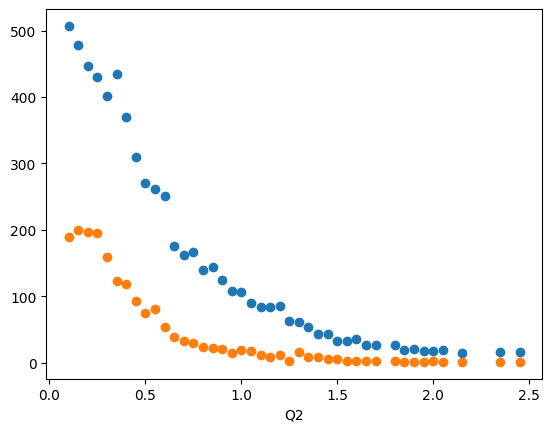

In [5]:
import pyNUISANCE as pn
import pyProSelecta as pps
import matplotlib.pyplot as plt

class comparison_guru:
    def __init__(self):
        self.rfact = pn.RecordFactory()
        self.input_source_mapping = {} # avoid dup inputs
        self.input_table_mapping = {} # map each input to table list
        self.table_comparisons = {} 
        
    def add(self, yaml_obj):
        source_input = yaml_obj["input"]
        if not source_input in self.input_source_mapping:
            self.input_source_mapping[source_input] = pn.EventSource("../../../runs/NUWRO-D2-ANL_77-numu/NUWRO.numu.numu_flux.ANL_1977_2horn_rescan.8652.evts.root")
        
        if not source_input in self.input_table_mapping:
            self.input_table_mapping[source_input] = []

        self.input_table_mapping[source_input].append(self.rfact.make_table( yaml_obj ))

    def add_hepdata(self, release, table, input_file):
        yaml_obj = {}
        yaml_obj["type"] = "hepdata"
        yaml_obj["input"] = input_file
        yaml_obj["release"] = release
        yaml_obj["table"] = table
        self.add(yaml_obj)
        
    def eval(self):

        self.table_comparisons = {}
        for obj in self.input_table_mapping:
            self.table_comparisons[obj] = []
            for tab in self.input_table_mapping[obj]: 
                comp = tab.comparison()
                tab.clear(comp)
                self.table_comparisons[obj].append( comp )

        for source_input in self.input_source_mapping:
            source = self.input_source_mapping[source_input]

            comparisons = self.table_comparisons[source_input]
            tables = self.input_table_mapping[source_input]
            
            count = 0
            for ev, cvw in source:
                filters = [t.select(ev) for t in tables] 
                projs   = [t.project(ev) for t in tables]
                
                for c,f,p in zip(comparisons, filters, projs):
                    w = 1
                    c.mc.fill(p[0], w)
            
                count += 1
                if count > 10000: break

        self.comparison_final = []
        for obj in self.input_table_mapping:
            for tab in self.input_table_mapping[obj]: 
                for comp in self.table_comparisons[obj]:
                    print(tab.get_metadata()["id"])
                    tab.finalize(comp, 1.0)                    
                    self.comparison_final.append( comp.estimate )
                    print(tab.likelihood(comp))                
                    comp.mc.mpl().scatter()                    
                    comp.data.mpl().scatter()
                    plt.show()
                    
rfact = pn.RecordFactory()
evs = pn.EventSource("../../../runs/NUWRO-D2-ANL_77-numu/NUWRO.numu.numu_flux.ANL_1977_2horn_rescan.8652.evts.root")
rec = rfact.make_record({"type": "hepdata", "release": "ANL/CCQE/182176/"})
hf = rec.table("EventCounts-Q2")
comp = hf.comparison()

cg = comparison_guru()
cg.add({ 
    "type": "hepdata",
    "release": "ANL/CCQE/182176/",
    "table": "EventCounts-Q2",
    "input": "../../../runs/NUWRO-D2-ANL_77-numu/NUWRO.numu.numu_flux.ANL_1977_2horn_rescan.8652.evts.root"
})
cg.eval()

# Grab the old records used for analysis and get the old table or a new one!
old_record = rfact.make_record( comp.metadata ) 
old_record_table = old_record.table( comp.metadata["table"] )
new_anl_table = old_record.table( "XSec-Enu" )

# Or just straight to the point for recreation
old_table  = rfact.make_table( comp.metadata )
print(old_table)


In [3]:
import pyNUISANCE as pn

In [4]:
pn.YamlNode({"dict":1})

TypeError: __init__(): incompatible constructor arguments. The following argument types are supported:
    1. pyNUISANCE._pyNUISANCE.YamlNode(arg0: str)
    2. pyNUISANCE._pyNUISANCE.YamlNode(arg0: _object)

Invoked with: {'dict': 1}

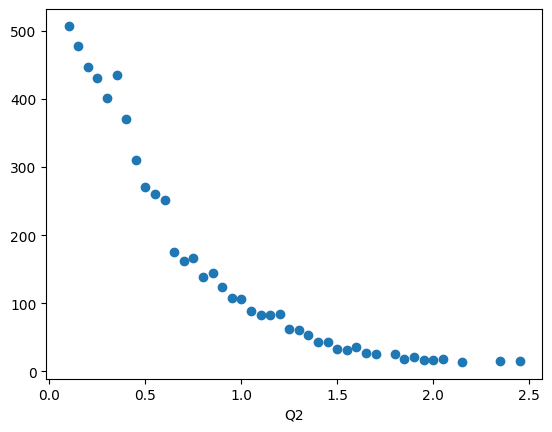

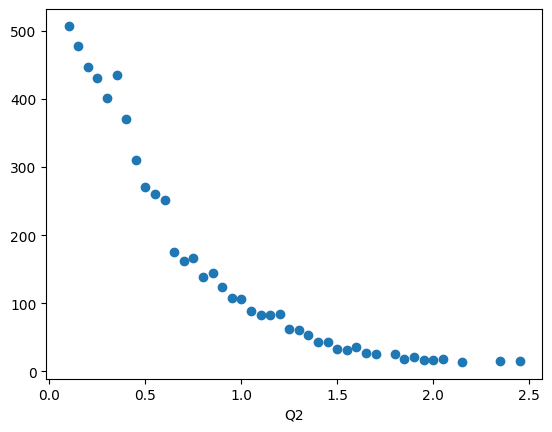

In [43]:
cg = comparison_guru()
cg.add_hepdata("ANL/CCQE/182176/", "EventCounts-Q2", "../../../runs/NUWRO-D2-ANL_77-numu/NUWRO.numu.numu_flux.ANL_1977_2horn_rescan.8652.evts.root")
cg.add_hepdata("ANL/CCQE/182176/", "EventCounts-Q2", "../../../runs/NUWRO-D2-ANL_77-numu/NUWRO.numu.numu_flux.ANL_1977_2horn_rescan.8652.evts.root")
cg.eval()

for sf in cg.table_comparisons:
    for plot in cg.table_comparisons[sf]:
        plot.mc.mpl().scatter()
        plt.show()


In [3]:
hf.comparison()

In [4]:
type(hf.blueprint.mc)

pyNUISANCE._pyNUISANCE.HistFrame

In [ ]:
mapping = {}
mapping[evs] = []
mapping[evs].append(rec)

for evs in mapping:
    